In [1]:
import numpy as np
import torch

import json

import matplotlib.pyplot as plt

import deblending_runjingdev.simulated_datasets_lib as simulated_datasets_lib
import deblending_runjingdev.psf_transform_lib as psf_transform_lib
import deblending_runjingdev.plotting_utils as plotting_utils
import deblending_runjingdev.elbo_lib as elbo_lib

np.random.seed(34534)

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
np.random.seed(5759)
_ = torch.manual_seed(1345)


In [4]:
slen = 10

In [5]:
test_image_file = '../test_image_20x20.npz'
full_image = torch.Tensor(np.load(test_image_file)['image']).unsqueeze(0).to(device)
true_locs = torch.Tensor(np.load(test_image_file)['locs']).to(device)
true_fluxes = torch.Tensor(np.load(test_image_file)['fluxes']).to(device)


In [6]:
image = full_image[0, 0, 0:10, 0:10]

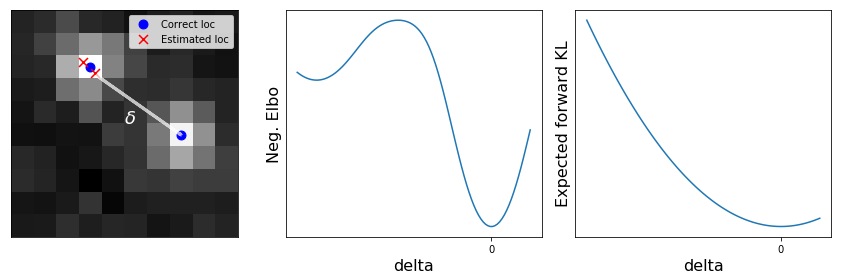

In [8]:
# do a cartoon plot

fig, axarr = plt.subplots(1, 3, figsize=(12, 4))

axarr[0].matshow(image, cmap=plt.cm.gray)

# plot locations
axarr[0].scatter(np.array([3, 7]), 
                 np.array([2, 5]),
                color = 'blue', s = 80, 
                label = 'Correct loc')

# plot "estimated" locations
axarr[0].scatter(np.array([2.7, 3.2]), 
                 np.array([1.8, 2.3]),
                color = 'red', s = 80, marker = 'x',
                label = 'Estimated loc')


# line segement defining alpha
axarr[0].arrow(3.3, 2.4,
               3.7, 2.6, 
            length_includes_head = True, 
            color = 'white', 
            alpha = 0.7, linewidth = 3)

axarr[0].text(4.5, 4.5, '$\delta$', color = 'white', size = 18)
axarr[0].set_yticks([])
axarr[0].set_xticks([])
axarr[0].legend()

x = torch.Tensor(np.linspace(-5, 1, 100))
axarr[1].plot(x, torch.sigmoid(x**2) + 
                  (torch.sigmoid((x + 4.5)**2) + 0.7) * 0.3 )

x = torch.Tensor(np.linspace(-5, 1, 100))
axarr[2].plot(x, x**2)

for i in range(1, 3): 
    axarr[i].set_yticks([])
    axarr[i].set_xticks([0])
    axarr[i].set_xlabel('delta', fontsize = 16)
    
axarr[1].set_ylabel('Neg. Elbo', fontsize = 16)
axarr[2].set_ylabel('Expected forward KL', fontsize = 16)

fig.tight_layout()

plt.savefig('../../figures/local_minima_cartoon.png')